In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn.utils import plt
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
import matplotlib
plt.style.use('seaborn')
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))
import mpld3

%matplotlib inline

# Entropy

Entropy - the amount of 'randomness' or 'surprise' in data.

[20-questions example](http://dsw.users.sonic.net/entropy.html)

Some code excerpts take [from here](http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section6_5-Decision-Trees.ipynb)

Shannon's 1948 paper [A Mathematical Theory of Communication](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf) is cited as the foundation of info theory.

Shannon's paper cites Hartley's [Transmission of Information (1928)](http://www3.alcatel-lucent.com/bstj/vol07-1928/articles/bstj7-3-535.pdf) as the originator of using the `log` function to model information for three reasons:

* Practicality. most technical system's capacity follows the log function
* Intuition.  Similar to the first, we think "two punched cards should have twice the capacity of one for information storage"
* Cleaner.  The limits of probability happen to match the limits of the log function.


In [2]:
def entropy(p, base=2):
    """ Calculate the entropy for a given probability or proportion 
    
    There's half a bit of entropy of information in an event wtih 50% probability:
    >>> entropy(.5, base=2)
    0.5
    
    There's more than 1/2 bit (shannon) in a 40% event. Why?
    >>> entropy(.4, base=2)
    0.52877123795494496
    """
    p = np.array(p)
    p[(p <= 0) | (p > 1)] = 1.
    return np.sum(-p * np.log(p) / np.log(base))

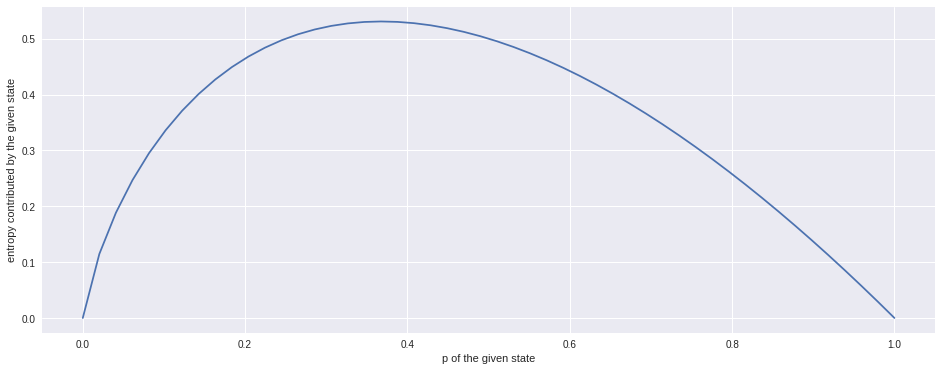

In [3]:
fig = plt.figure(5, figsize=(16,6))
plt.xlabel("p of the given state")
plt.ylabel("entropy contributed by the given state")
pvals = np.linspace(0, 1)  
ax = plt.plot(pvals, [entropy(p) for p in list(pvals)])

In [4]:
entropy(.4), entropy(.5), entropy(.6)

(0.52877123795494496, 0.5, 0.44217935649972379)

In [5]:
entropy(0.5) + entropy(0.5)

1.0

In [6]:
entropy([.5, .5])

1.0

In [7]:
# entropies don't sum to 1 even if their probabilities do
entropy(0.6) + entropy(0.4)

0.9709505944546688

In [8]:
entropy([1/3., 1/3., 1/3.])

1.5849625007211561

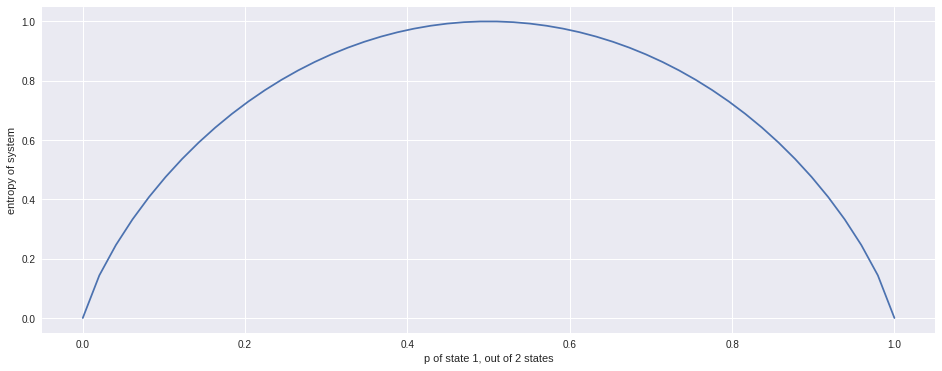

In [9]:
fig = plt.figure(6, figsize=(16,6))
plt.xlabel("p of state 1, out of 2 states")
plt.ylabel("entropy of system")
pvals = np.linspace(0, 1)  
ax = plt.plot(pvals, [entropy(p) + entropy(1 - p) for p in list(pvals)])

In [10]:
def value_entropy(values):
    values = np.array(values)
    unique_values, counts = np.unique(values, return_counts=True)
    freqs = counts.astype('float') / len(values)
    return entropy(freqs)


In [11]:
value_entropy(pd.Series([2,2,2,2]))

0.0

In [12]:
value_entropy(pd.Series([2,2,5,5]))

1.0

In [13]:
value_entropy(pd.Series([2,2,2,5]))

0.81127812445913283

## Your Turn

1. What is the entropy of the player in the 20-questions game in the [README](README.md)?
2. Play a game of 20-questions with your neighbor and try to maximize the entropy the answers to your questions.
3. Compute the entropy in a sequence of stock closing prices, converted to bits (for price goes up vs goes down)

  
  
  
  
  
  
  
  
  
  














----

## 20 questions for flower identification!

We'll use the sklearn Iris Data set.

We'll build a **decision tree** in raw python.  

We'll train it by maximizing the entropy at each decision "branch" of the tree.  

In [14]:
from sklearn import datasets
import pandas as pd
import numpy as np
from seaborn.utils import plt

iris = datasets.load_iris()
data_t0 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 2])
# df = pd.DataFrame([[row for i,row in enumerate(iris_data.data) if iris_data.target[i] == t] for t in range(3)]).T
# df.columns = ['t{}'.format(i) for i in range(3)]
# df.head()

In [15]:
step = 0.001

data_d2l = np.array([[row[2], iris.target[i]] for (i, row) in enumerate(iris.data)])
e_x = np.arange(0.9, 7 + step, step)
entropies = []
for cutoff in e_x:
    left_list = [int(c) for [x,c] in data_d2l if x < cutoff]
    right_list = [int(c) for [x,c] in data_d2l if x >= cutoff]

    entropies.append(value_entropy(left_list) + value_entropy(right_list))

pd.DataFrame(entropies)

,0
0,1.584963
1,1.584963
2,1.584963
...,...
6098,1.584963
6099,1.584963
6100,1.584963


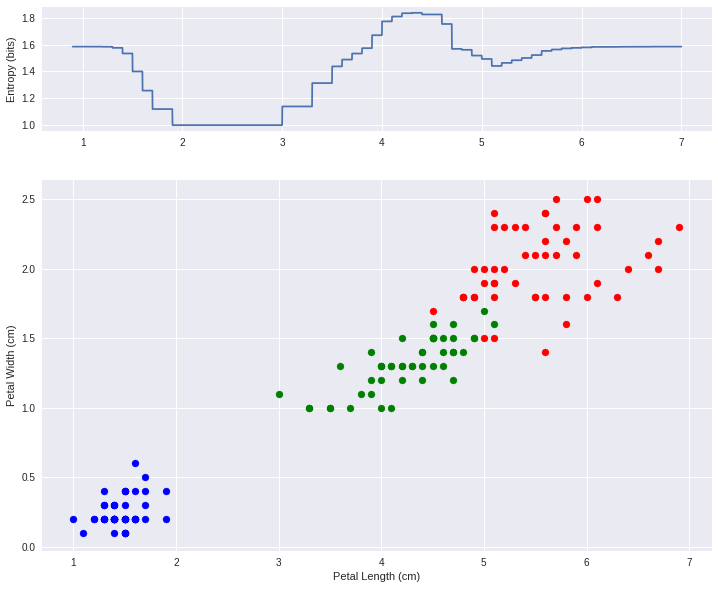

In [18]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(10,figsize=(12, 10)) 
gs = GridSpec(2, 1, height_ratios=[1, 3]) 
ax0 = plt.subplot(gs[0])
ax0.plot(e_x,entropies)
ax0.set_ylabel("Entropy (bits)")

ax1 = plt.subplot(gs[1])
ax1.scatter(data_t0[:,2], data_t0[:,3], color = 'b', label=iris.target_names[0])
ax1.scatter(data_t1[:,2], data_t1[:,3], color = 'g', label=iris.target_names[1])
ax1.scatter(data_t2[:,2], data_t2[:,3], color = 'r', label=iris.target_names[2])
ax1.set_xlabel("Petal Length (cm)")
ax1.set_ylabel("Petal Width (cm)")
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(max_depth=2, criterion="entropy") # construct a decision tree.
print(iris.data.shape)
dt.fit(iris.data, iris.target)  # train it on the dataset
dt


(150, 4)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

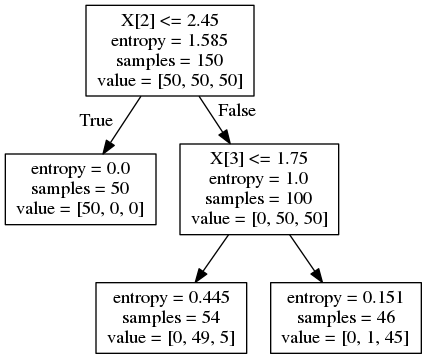

In [35]:
# sudo apt install python3-graphviz
from IPython.display import Image
dot_file = export_graphviz(dt, out_file='iris_dtree.dot')  #export the tree to .dot file
!dot -T png iris_dtree.dot -o iris_dtree.png
Image(filename='iris_dtree.png')


In [37]:
iris.feature_names
value_entropy(['green'] * 5 + ['red'] * 49)

0.44506485705083865

In [34]:
dt.score(iris.data, iris.target)

0.95999999999999996